###### Prepare a prediction model for profit of 50 startups data.
    + Do transformations for getting better predictions of profit and
    + make a table containing R^2 value for each prepared model.

+ R&D Spend -- Research and devolop spend in the past few years
+ Administration -- spend on administration in the past few years
+ Marketing Spend -- spend on Marketing in the past few years
+ State -- states from which data is collected
+ Profit  -- profit of each state in the past few years


In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#calling the 50 startups dataset
Startups=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\5.Multi Linear Regression\50_Startups.csv')
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Performing EDA & necessary transformation

In [3]:
#checking basic information
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#checking for null values
Startups.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
#checking for duplicate values
Startups.duplicated().sum()

0

In [6]:
#checking sum.duplicated().sum()mary statistics
Startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


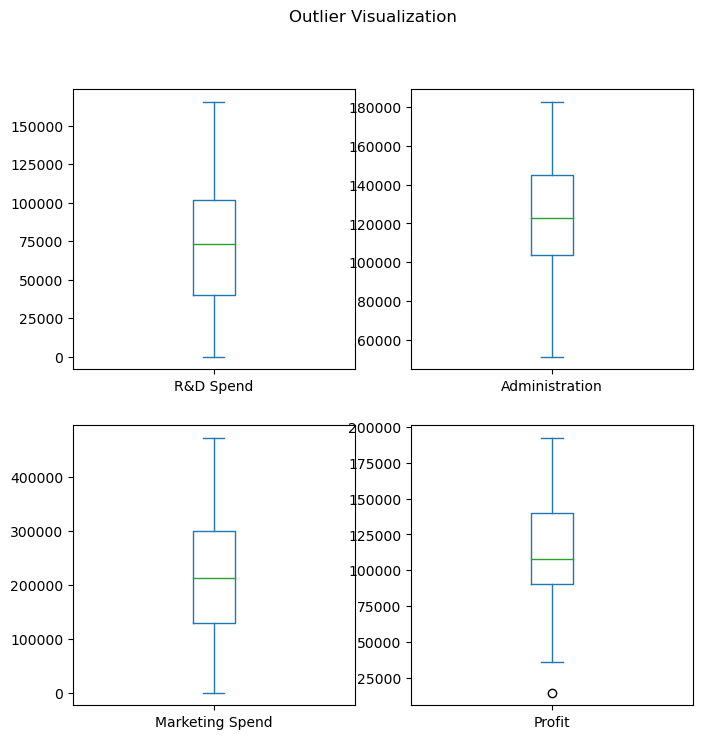

In [7]:
#outlier visualization
Startups.plot(kind='box',subplots=True,layout=(2,2),figsize=(8,8),title='Outlier Visualization')
plt.show()

We have called the dataset into python environment and checked the basic informations.
+ There are 50 entries(50 rows & 5 columns)
+ The data types are float & object, ie one column in the dataset is categorical.
+ There is no null values & no duplicate values.
+ There is an outlier in the profit column.

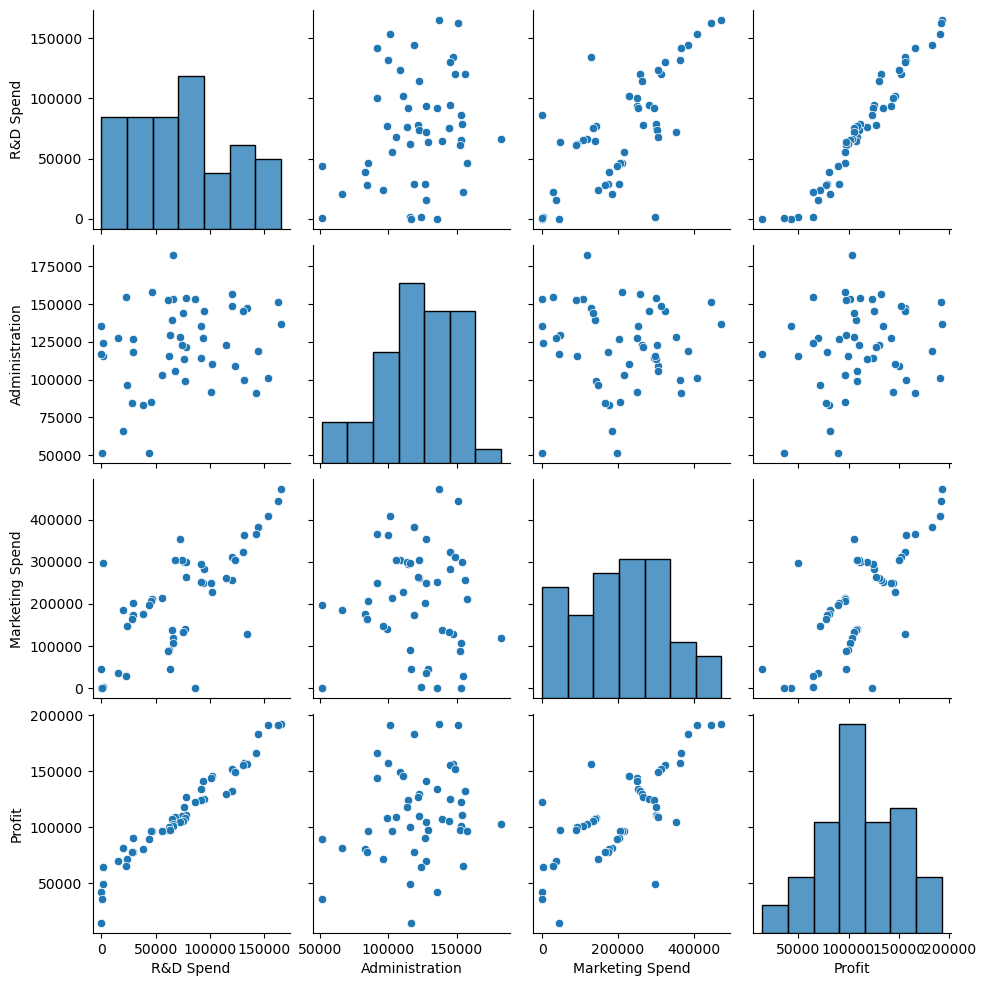

In [8]:
#checking correlation & linearity visually
sns.pairplot(Startups)

In [9]:
#checking correlation
Startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


By observing the pair plot we can say that:
+ There is a linear relationship between 'R&D Spend' & 'Profit' and also they are  positively correlated with score of 0.9729.
+ Compairing to another departments 'Administration' is less correlated with 'Profit'.

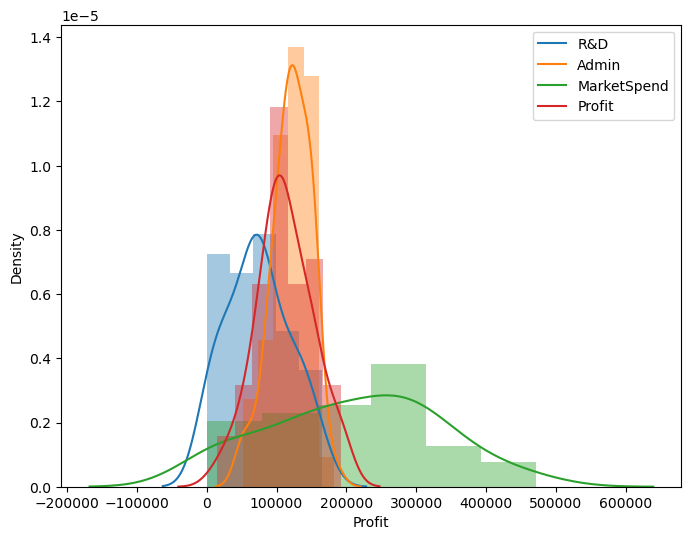

In [10]:
#checking the normality using dist plots
plt.figure(figsize=(8,6))
labels=['R&D','Admin','MarketSpend','Profit']
sns.distplot(Startups['R&D Spend'], kde = True)
sns.distplot(Startups['Administration'],hist = True)
sns.distplot(Startups['Marketing Spend'],hist = True)
sns.distplot(Startups['Profit'],hist = True)
plt.legend(labels)

In [11]:
Startup_Data=Startups.copy()
#changing the column names
Startup_Data=Startup_Data.rename({"R&D Spend":'RnD_Spend',"Administration":'Admin',"Marketing Spend":'Market_Spend',"State":'State',"Profit":'Profit'},axis=1)
Startup_Data.head()

,RnD_Spend,Admin,Market_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


###### We are going to check whether the data follows normal distribution. For that we use Shapiro-Wilk test. If the p-value is less than 0.05 we reject the null hypothesis, otherwise we accept it.
The hypothesis are:
+ H0:Data follows normal distribution
+ H1:Data doesnot follow normal distribution

In [12]:
import scipy.stats as stat

from scipy.stats import shapiro

#perform Shapiro-Wilk test
print('R&D Spend feature',shapiro(Startup_Data.RnD_Spend),'\n'
     'Administration feature',shapiro(Startup_Data.Admin),'\n'
     'Marketing Spend feature',shapiro(Startup_Data.Market_Spend),'\n'
     'Profit feature',shapiro(Startup_Data.Profit))

R&D Spend feature ShapiroResult(statistic=0.9673415422439575, pvalue=0.18005383014678955) 
Administration feature ShapiroResult(statistic=0.9702357649803162, pvalue=0.23660743236541748) 
Marketing Spend feature ShapiroResult(statistic=0.9743665456771851, pvalue=0.3450852632522583) 
Profit feature ShapiroResult(statistic=0.9848828911781311, pvalue=0.7665575742721558)


###### Here all the p-values are greater than 0.05. Therefore we fail to reject the null hypothesis. The data follows Normal distribution.

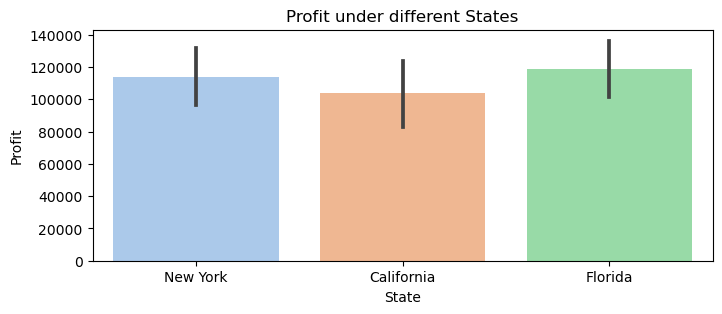

In [13]:
#visualization of the categorical feature in the dataset
plt.figure(figsize=(8,3)) 
pal=sns.color_palette("pastel")
sns.barplot(x="State",y="Profit",
            data=Startup_Data, 
            palette=pal)
plt.title('Profit under different States')
plt.xticks(fontsize=10) 
plt.show()

###### Outlier Detection

In [14]:
#finding out the outlier in the 'Profit' column
Q1=np.quantile(Startup_Data.Profit,0.25)
Q3=np.quantile(Startup_Data.Profit,0.75)
Q2=np.median(Startup_Data.Profit)
IQR=Q3-Q1
upper_bound=Q3+(1.5*IQR)
lower_bound=Q1-(1.5*IQR)
print('First Quantile=',Q1,'\n' 'Second Quantile=',Q2,'\n' 'Third Quantile=',Q3,'\n'
      'Inter-Quartile Range=',IQR,'\n' 'Upper Whisker=',upper_bound,'\n' 'Lower Whisker=',lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [15]:
Outliers=Startup_Data.Profit[(Startup_Data.Profit<=lower_bound) | (Startup_Data.Profit>=upper_bound)]
print('The outlier in the Profit column is:',Outliers)

The outlier in the Profit column is: 49    14681.4
Name: Profit, dtype: float64


In [16]:
display(Startup_Data[Startup_Data.index.isin([49])])

,RnD_Spend,Admin,Market_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


We need to handle this outlier.Before deciding on how to handle an outlier, it's crucial to understand the reason behind its occurrence. 
+ Outliers can arise due to various factors such as data entry errors, measurement errors, or genuine extreme values. By identifying the cause, we can make a more informed decision on how to handle it.
  + If the outlier is by a data entry mistake, we can remove it.
+ In some cases, outliers may carry valuable information or represent important events or phenomena. If we have a legitimate reason to believe the outlier is meaningful and representative of the underlying data, we can choose to keep it as it is.
+ Instead of removing the outlier,we can consider transforming the data using mathematical functions. For example, we could apply a logarithmic,square root,cube root transformation to reduce the impact of extreme values while preserving the overall distribution.  
+ We can also try median or mean imputation.

###### Lets try whether the logarithmic,square root,cube root transformation on data will reduce the impact of extreme value. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1af4cd05640>,
 'caps': [<matplotlib.lines.Line2D at 0x1af4cd05d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af4cd050a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1af4cce8520>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af4cce8c10>],
 'means': []}

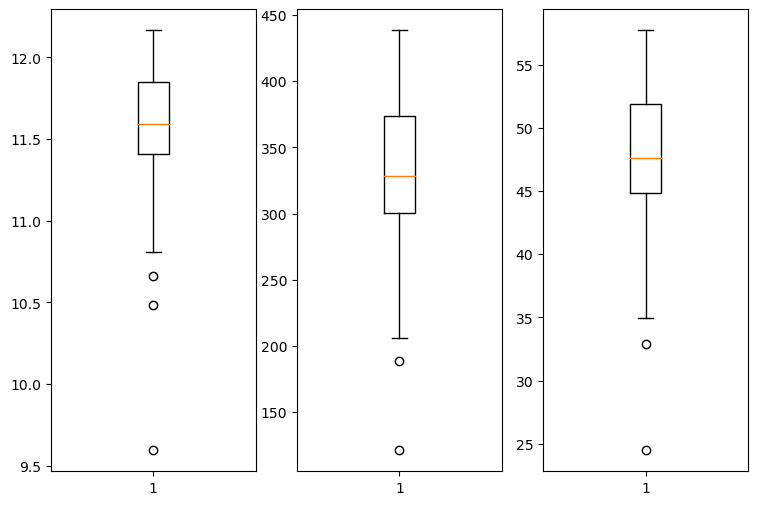

In [17]:
plt.subplots(figsize=(9,6))
plt.subplot(131)
plt.boxplot(np.log(Startup_Data['Profit']))
plt.subplot(132)
plt.boxplot(np.sqrt(Startup_Data['Profit']))
plt.subplot(133)
plt.boxplot(np.cbrt(Startup_Data['Profit']))

As observing the above graph we can understand that the logarithmic,square root,cube root transformation on data doesnot reduce the impact of extreme value.So we need to remove the outlier or we can try mean or median imputation. 

###### Before handling outliers lets build a model and compare its R-squared value with other techniques to see which technique suits best for this case

In [18]:
import statsmodels.formula.api as smf 

In [19]:
Model_with_Outlier=smf.ols("Profit~RnD_Spend+Admin+Market_Spend",data=Startup_Data).fit()
Model_with_Outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        10:08:56   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD_Spend        0.8057      0.045     17.846      0.000       0.715       0.897
Admin           -0.0268      0.051     -0.526      0.602      -0.130       0.076
Market_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared score of 0.951 indicates that the model explains about 95.1% of the variance in the profit based on the Research and devolop spend,Administration spend,Marketing Spend.

###### Median Imputation to handle Outlier in Profit

In [20]:
Startup_Data.Profit.median()

107978.19

In [21]:
Data_1=Startup_Data.copy()

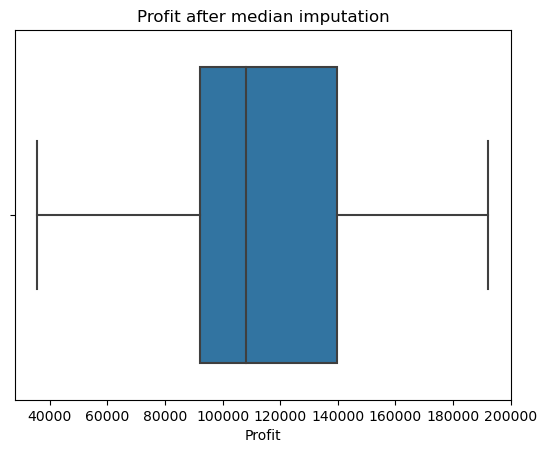

In [22]:
for i in Data_1['Profit']:
    q1=np.quantile(Data_1.Profit,0.25)
    q3=np.quantile(Data_1.Profit,0.75)
    q2=np.median(Data_1.Profit)
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        Data_1['Profit']=Data_1['Profit'].replace(i,np.median(Data_1['Profit']))
sns.boxplot(Data_1['Profit'])
plt.title('Profit after median imputation')
plt.show()

###### Building model after median imputation 

In [23]:
after_median_imputation_model=smf.ols("Profit~RnD_Spend+Admin+Market_Spend",data=Data_1).fit()
after_median_imputation_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.3
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           5.06e-25
Time:                        10:08:56   Log-Likelihood:                -534.81
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.594e+04   7936.330      7.049      0.000       4e+04    7.19e+04
RnD_Spend        0.7472      0.055     13.707      0.000       0.638       0.857
Admin           -0.0149      0.062     -0.242      0.810      -0.139       0.109
Market_Spend     0.0221      0.020      1.112      0.272      -0.018       0.062
==============================================================================
Omnibus:                       45.356   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.667
Skew:                           2.221   Prob(JB):                     1.82e-51
Kurtosis:                      12.614   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared score of 0.918 indicates that the model explains about 91.8% of the variance in the profit based on the Research and devolop spend,Administration spend,Marketing Spend.

###### Mean Imputation to handle Outlier in Profit

In [24]:
Data_2=Startup_Data.copy()

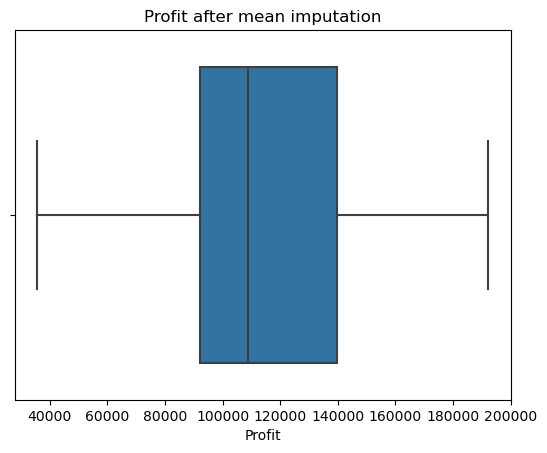

In [25]:
for i in Data_2['Profit']:
    q1=np.quantile(Data_2.Profit,0.25)
    q3=np.quantile(Data_2.Profit,0.75)
    q2=np.median(Data_2.Profit)
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        Data_2['Profit']=Data_2['Profit'].replace(i,np.mean(Data_2['Profit']))
sns.boxplot(Data_2['Profit'])
plt.title('Profit after mean imputation')
plt.show()

###### Building model after mean imputation

In [26]:
after_mean_imputation_model=smf.ols("Profit~RnD_Spend+Admin+Market_Spend",data=Data_2).fit()
after_mean_imputation_model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     158.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           2.82e-24
Time:                        10:08:56   Log-Likelihood:                -536.67
No. Observations:                  50   AIC:                             1081.
Df Residuals:                      46   BIC:                             1089.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.619e+04   8236.731      6.822      0.000    3.96e+04    7.28e+04
RnD_Spend        0.7447      0.057     13.162      0.000       0.631       0.859
Admin           -0.0144      0.064     -0.226      0.823      -0.143       0.114
Market_Spend     0.0219      0.021      1.061      0.294      -0.020       0.063
==============================================================================
Omnibus:                       50.346   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.669
Skew:                           2.466   Prob(JB):                     1.55e-67
Kurtosis:                      14.107   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

+ The R-squared score of 0.912 indicates that the model explains about 91.2% of the variance in the profit based on the Research and devolop spend,Administration spend,Marketing Spend.
+ Here the r square score is less compaired to previous model.
+ Next we can try to create a model by removing the outlier.

###### Removing Outlier

In [27]:
Data_3=Startup_Data.copy()

In [28]:
def drop_outliers(Data_3,field_name):
    iqr=1.5*(np.percentile(Data_3[field_name],75)-np.percentile(Data_3[field_name],25))
    Data_3.drop(Data_3[Data_3[field_name] > (iqr+np.percentile(Data_3[field_name],75))].index,inplace=True)
    Data_3.drop(Data_3[Data_3[field_name] < (np.percentile(Data_3[field_name],25)-iqr)].index, inplace=True)

Text(0.5, 1.0, 'Profit after removing outliers')

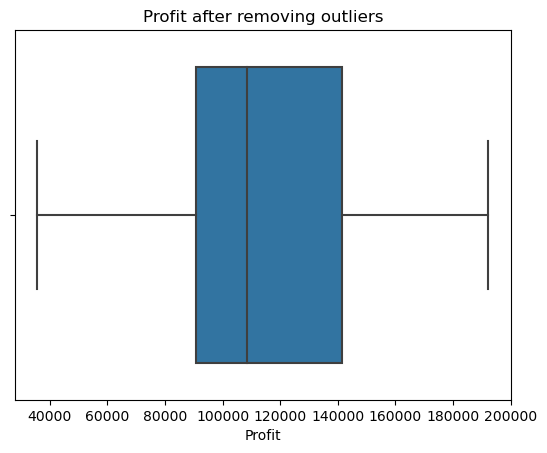

In [29]:
drop_outliers(Data_3,'Profit')
sns.boxplot(Data_3.Profit)
plt.title('Profit after removing outliers')

###### Building model after removing outlier

In [30]:
removed_outlier_model=smf.ols("Profit~RnD_Spend+Admin+Market_Spend",data=Data_3).fit()
removed_outlier_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           8.85e-32
Time:                        10:08:57   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RnD_Spend        0.7830      0.038     20.470      0.000       0.706       0.860
Admin           -0.0222      0.043     -0.518      0.607      -0.109       0.064
Market_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

+ The R-squared score of 0.961 indicates that the model explains about 96.1% of the variance in the profit based on the Research and devolop spend,Administration spend,Marketing Spend.
+ A slightly better score than the raw data model.So we can continue with this data.

In [31]:
Data_3.head()

,RnD_Spend,Admin,Market_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


+ Above we have plot a bar plot for the categorical feature 'State',from there we can see that ,it has balanced data all the unique values are approximately equally distributed.
+ There is'nt much of difference between how much profit each state generates from each other and there is'nt any direct relation.
+ So we are going to drop this feature while building model as it is an irrelevant feature for our inferences.

In [32]:
#droping 'State' column
Data_3=Data_3.drop('State',axis=1)
Data_3.head(3)

,RnD_Spend,Admin,Market_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39


<AxesSubplot:>

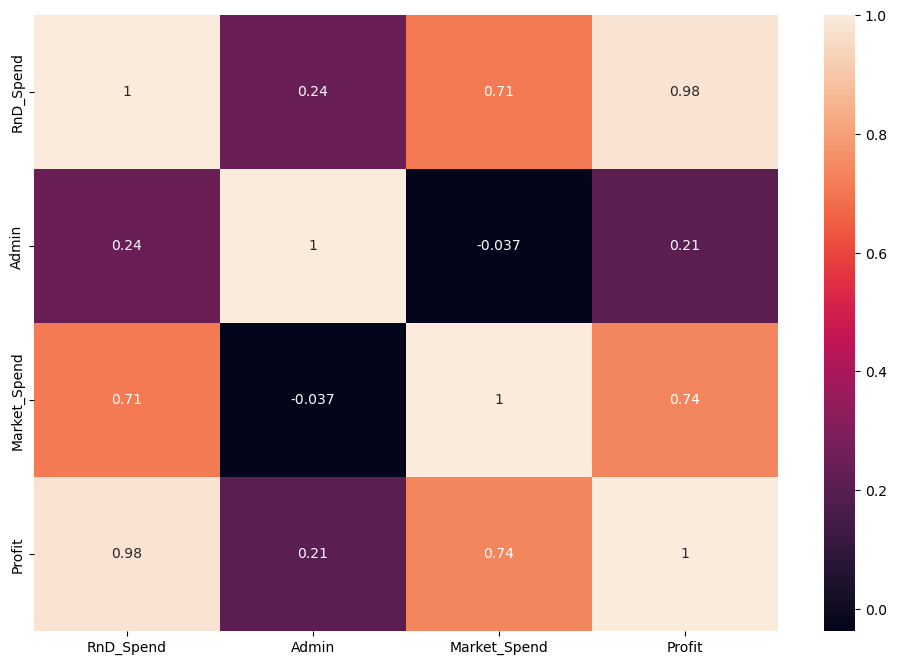

In [33]:
#checking correlation between feature using heat map
plt.figure(figsize=(12,8))
sns.heatmap(
    Data_3.corr(),
    annot=True)

+ R&D spend has the highest score of correlation with profit. 
+ Marketing and R&D also have a collinearity among themselves which will affect our model.

In [34]:
Data_4=Data_3.copy()

###### Feature Engineering

In [35]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

Scaled_Data_3=scaler.fit_transform(Data_3.values)
Scaled_Data_3=pd.DataFrame(Scaled_Data_3,columns=Data_3.columns)

In [36]:
Scaled_Data_3

,RnD_Spend,Admin,Market_Spend,Profit
0,2.018325,0.552080,2.146120,2.071556
1,1.956704,1.069017,1.913596,2.059122
2,1.751650,-0.724297,1.613709,2.039490
3,1.548545,-0.098597,1.407457,1.823808
4,1.497818,-1.072513,1.265442,1.381401
5,1.268706,-0.771809,1.237866,1.137968
6,1.330036,0.919834,-0.722891,1.114977
7,1.233349,0.860257,0.912791,1.105185
8,1.014870,0.974102,0.810533,1.011462
9,1.077405,-0.455342,0.755234,0.946565


In [37]:
#checking the mean & standard deviation after standardization
print('Mean' '\n',np.round(Scaled_Data_3.mean(),1),'\n' 'Standard Devaition','\n',np.round(Scaled_Data_3.std()),1)

Mean
 RnD_Spend       0.0
Admin          -0.0
Market_Spend   -0.0
Profit         -0.0
dtype: float64 
Standard Devaition 
 RnD_Spend       1.0
Admin           1.0
Market_Spend    1.0
Profit          1.0
dtype: float64 1


##### Building Multi-Linear Regression 

+ For building Multi Linear Resgression there are assumption regarding the data set.They are as follows:-
  + Feature should be independent of each other. There should'nt be any dependency upon each other.
  + There shouldn't be any other relation but Linear relation amongst model parameters (Hyperparameters of the model the intercept and coefficient).
  + Each Feature and Model Error (residuals) should be independent of each other.
  + Constant Variance (Homoscedasticity) in Error, it should have Normal / Gaussian distribution~N(0,1) and idenpendently and identically distributed.
  + There should be a linear relation between the dependent variable and Independent variables.
+ If any of the above step is not followed our model can't be a good predictor.We will Check the above one by one.

###### Building model

In [38]:
import statsmodels.formula.api as sm

model=sm.ols("Profit~RnD_Spend+Admin+Market_Spend",data=Scaled_Data_3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           8.85e-32
Time:                        10:08:58   Log-Likelihood:                 10.154
No. Observations:                  49   AIC:                            -12.31
Df Residuals:                      45   BIC:                            -4.741
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.839e-16      0.029  -6.27e-15      1.000      -0.059       0.059
RnD_Spend        0.9254      0.045     20.470      0.000       0.834       1.017
Admin           -0.0165      0.032     -0.518      0.607      -0.080       0.048
Market_Spend     0.0801      0.044      1.825      0.075      -0.008       0.168
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                         2.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Model Testing
+ ŷ = β0 + β1(x1) + β2(x2) + β3(x3) + … + βk(xk)

In [39]:
# Finding Coefficient parameters
model.params

Intercept      -1.838807e-16
RnD_Spend       9.254411e-01
Admin          -1.646059e-02
Market_Spend    8.009988e-02
dtype: float64

+ Assupmtion for multi linear Regression fails.
+ Feature should be independent of each other there should'nt be any dependency upon each other

In [40]:
# Finding tvalues and pvalues
display(np.round(model.tvalues,3),np.round(model.pvalues,3))

Intercept       -0.000
RnD_Spend       20.470
Admin           -0.518
Market_Spend     1.825
dtype: float64

Intercept       1.000
RnD_Spend       0.000
Admin           0.607
Market_Spend    0.075
dtype: float64

+ Here,for Intercept(Beta0),p_value ~ 1
+ Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
+ Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)
+ Observations:
  + (Intercept) Beta0: tvalue=-0.000 , pvalue=1.000
  + (RnD_Spend) Beta1: tvalue=20.470, pvalue= 0.000
  + (Admin) Beta2: tvalue=-0.518, pvalue= 0.607
  + (Market_Spend) Beta3: tvalue=1.825, pvalue= 0.075
+ If (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(RnD_Spend) variable has good slope and variance w.r.t Y(Profit) variable.
+ If (pvalue=0)>(α=0.05); We fail to reject Null hyp. Thus, X1(Admin) and X2(Market_Spend) variable doesn't have good slope
+ Until further tests

###### Performing Simple Linear Regression to check separately  the dependency between those feature with Target feature

###### Profit~Admin

In [41]:
Admin_slr_model=sm.ols("Profit~Admin",data=Scaled_Data_3).fit()
Admin_slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     2.080
Date:                Wed, 12 Jul 2023   Prob (F-statistic):              0.156
Time:                        10:08:58   Log-Likelihood:                -68.467
No. Observations:                  49   AIC:                             140.9
Df Residuals:                      47   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.839e-16      0.143  -1.29e-15      1.000      -0.287       0.287
Admin          0.2058      0.143      1.442      0.156      -0.081       0.493
==============================================================================
Omnibus:                        1.016   Durbin-Watson:                   0.084
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                1.052
Skew:                           0.310   Prob(JB):                        0.591
Kurtosis:                       2.639   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Finding tvalues and pvalues
display(np.round(Admin_slr_model.tvalues,3),np.round(Admin_slr_model.pvalues,3))

Intercept   -0.000
Admin        1.442
dtype: float64

Intercept    1.000
Admin        0.156
dtype: float64

###### Profit~Market_Spend

In [43]:
Market_Spend_slr_model=sm.ols("Profit~Market_Spend",data=Scaled_Data_3).fit()
Market_Spend_slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     56.66
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.30e-09
Time:                        10:08:58   Log-Likelihood:                -50.150
No. Observations:                  49   AIC:                             104.3
Df Residuals:                      47   BIC:                             108.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.839e-16      0.098  -1.87e-15      1.000      -0.198       0.198
Market_Spend     0.7393      0.098      7.527      0.000       0.542       0.937
==============================================================================
Omnibus:                        4.458   Durbin-Watson:                   1.140
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.096
Skew:                          -0.303   Prob(JB):                        0.129
Kurtosis:                       4.281   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Finding tvalues and pvalues
display(np.round(Market_Spend_slr_model.tvalues,3),np.round(Market_Spend_slr_model.pvalues,3))

Intercept      -0.000
Market_Spend    7.527
dtype: float64

Intercept       1.0
Market_Spend    0.0
dtype: float64

###### Lets combine 'admin' & 'marketing' features to predict profit

So if we combine admin and marketing feature to predict profit we should get a total R-sqaure value of 0.589.

In [45]:
Admin_Market=sm.ols('Profit~Admin+Market_Spend',data=Scaled_Data_3).fit()
Admin_Market.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     34.66
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           6.59e-10
Time:                        10:08:58   Log-Likelihood:                -47.010
No. Observations:                  49   AIC:                             100.0
Df Residuals:                      46   BIC:                             105.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.839e-16      0.093  -1.97e-15      1.000      -0.187       0.187
Admin            0.2337      0.093      2.508      0.016       0.046       0.421
Market_Spend     0.7480      0.093      8.027      0.000       0.560       0.936
==============================================================================
Omnibus:                        6.637   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                7.219
Skew:                          -0.454   Prob(JB):                       0.0271
Kurtosis:                       4.646   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

######  Calculating VIF ( Variance Inflation Factor )
+ This helps to check the dependency among the features by building a model without the target and testing various combination among the features.

In [46]:
# Method to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x=Data_4[['Market_Spend','Admin','RnD_Spend']]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[vif(x.values,i) for i in range(len(x.columns))]
vif_data.sort_values(by=['VIF'])

,Features,VIF
1,Admin,4.218831
0,Market_Spend,7.589312
2,RnD_Spend,8.602235


In [47]:
x=Data_4[['Market_Spend','RnD_Spend']]
vif_data=pd.DataFrame()
vif_data['Features']=x.columns
vif_data['VIF']=[vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
0,Market_Spend,7.186744
1,RnD_Spend,7.186744


+ Some of the variables has VIF>5, Yes there is Collinearity, hence we cannot consider all varaibles in Regression equation.
+ As we can observe this test is not giving us much of an information to come up to an conclusion, let's try another approach that will justify our first test we conducted.

###### Let's build two models, in each model one of the feature will not be present and then we can come to an conclusion that  which of the feature should be removed, by comparing the model parameters.

In [48]:
Admin_RnD_model=sm.ols('Profit~RnD_Spend+Admin',data=Scaled_Data_3).fit()
Admin_RnD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     530.6
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.69e-32
Time:                        10:08:58   Log-Likelihood:                 8.4042
No. Observations:                  49   AIC:                            -10.81
Df Residuals:                      46   BIC:                            -5.133
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.839e-16      0.030  -6.12e-15      1.000      -0.060       0.060
RnD_Spend      0.9868      0.031     31.847      0.000       0.924       1.049
Admin         -0.0344      0.031     -1.110      0.273      -0.097       0.028
==============================================================================
Omnibus:                        0.444   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.245
Skew:                          -0.173   Prob(JB):                        0.885
Kurtosis:                       2.972   Cond. No.                         1.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


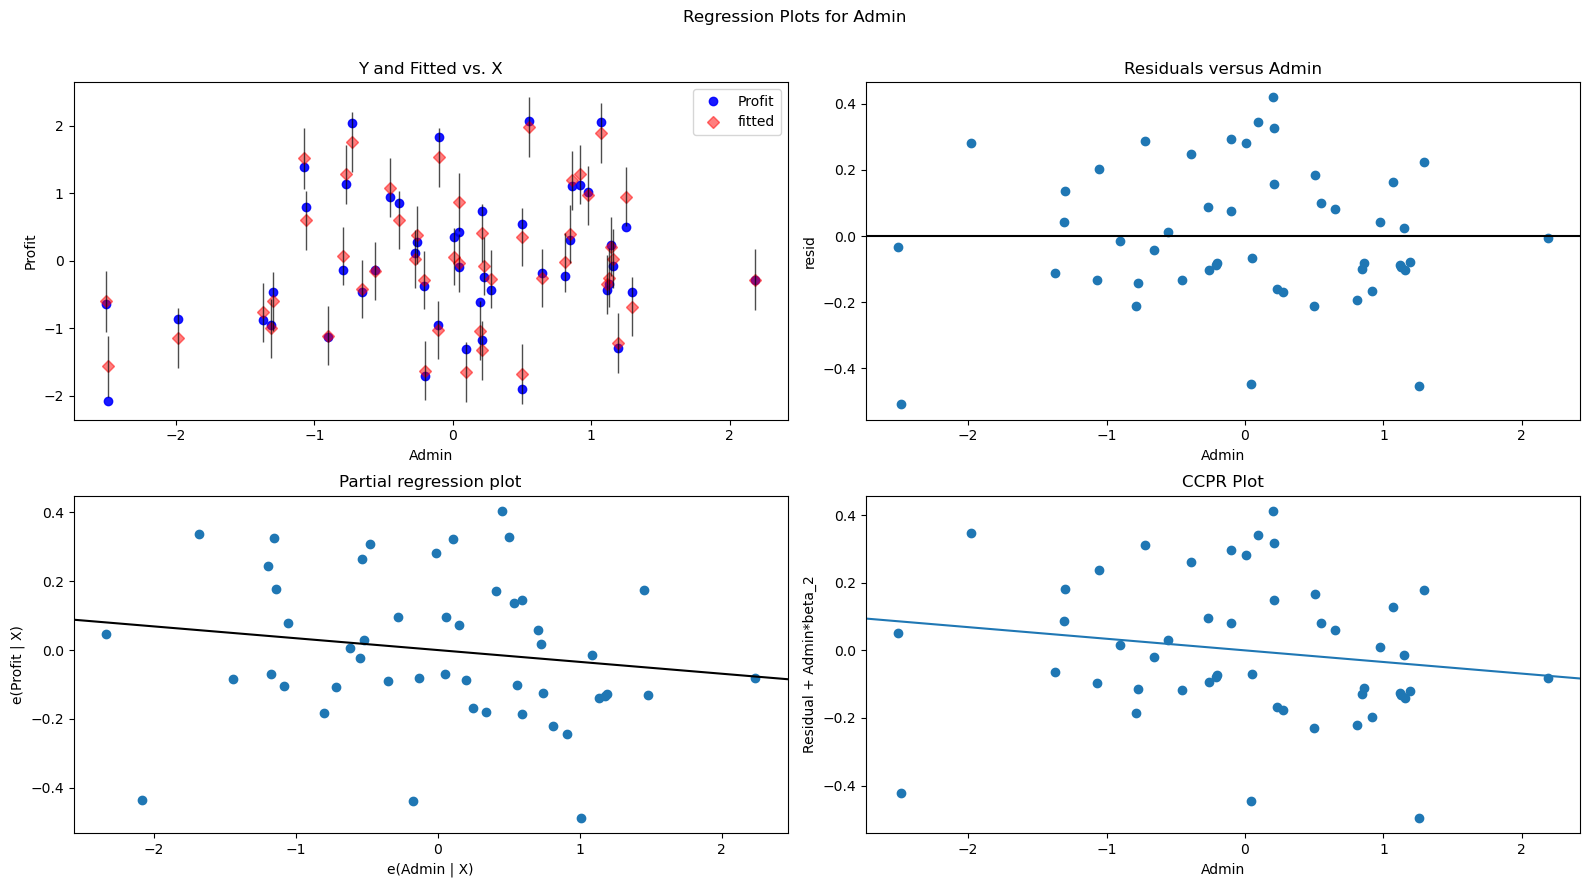

In [49]:
import statsmodels.api as smf

fig=plt.figure(figsize=(16,9))
smf.graphics.plot_regress_exog(Admin_RnD_model,'Admin',fig=fig)
plt.show()

In [50]:
Market_RnD_model=sm.ols('Profit~RnD_Spend+Market_Spend',data=Scaled_Data_3).fit()
Market_RnD_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           3.74e-33
Time:                        10:09:01   Log-Likelihood:                 10.009
No. Observations:                  49   AIC:                            -14.02
Df Residuals:                      46   BIC:                            -8.342
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.839e-16      0.029  -6.32e-15      1.000      -0.059       0.059
RnD_Spend        0.9164      0.041     22.136      0.000       0.833       1.000
Market_Spend     0.0871      0.041      2.104      0.041       0.004       0.170
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


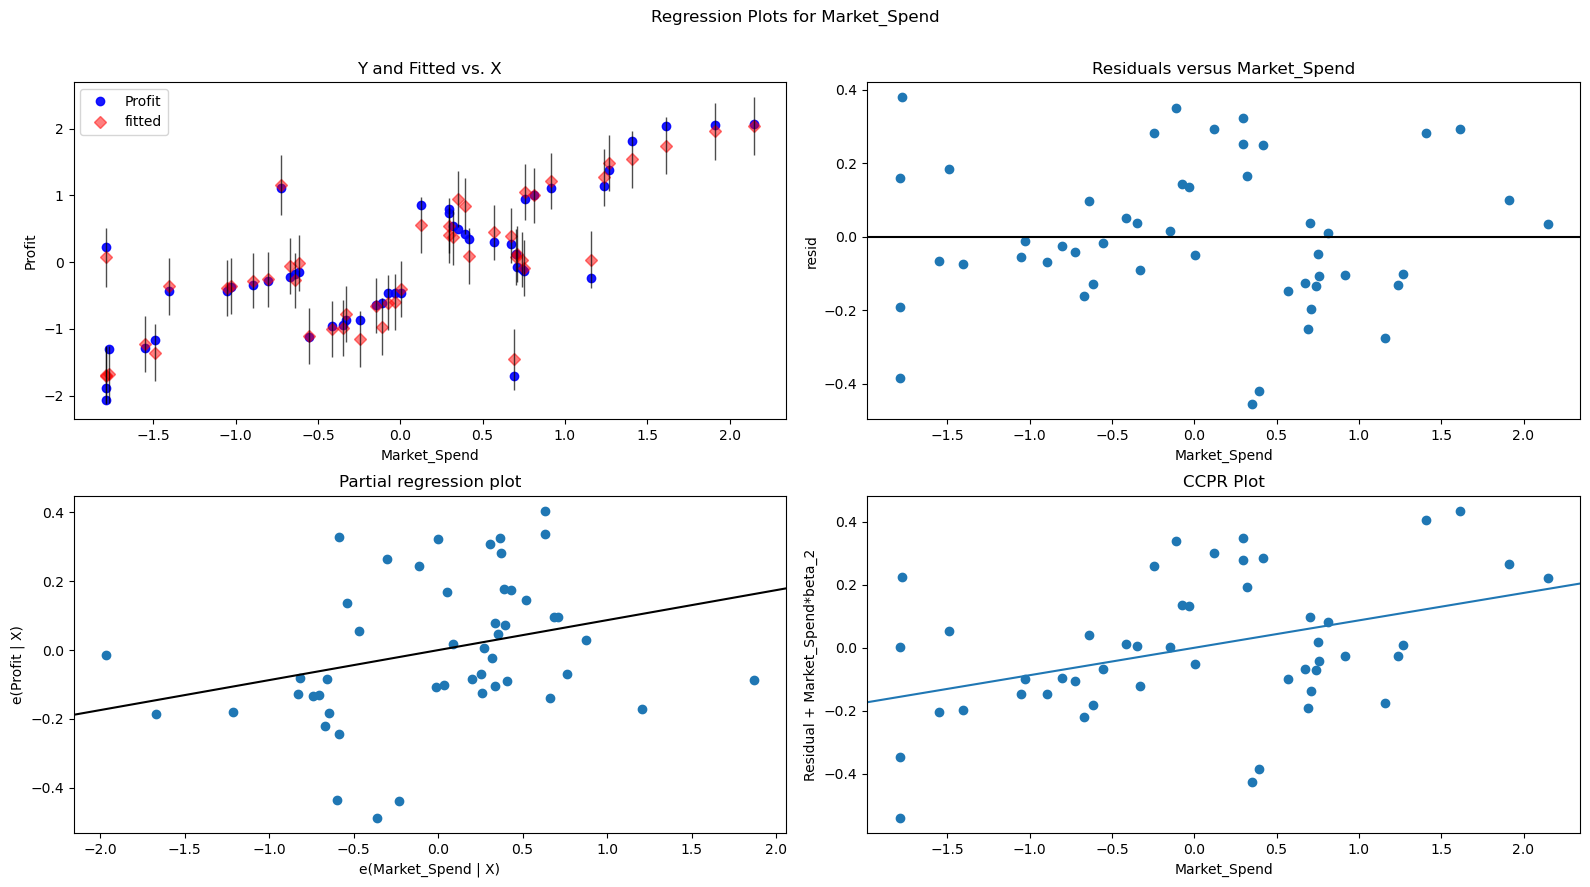

In [51]:
fig=plt.figure(figsize=(16,9))
smf.graphics.plot_regress_exog(Market_RnD_model,'Market_Spend',fig=fig)
plt.show()

In [52]:
RnD_slr_model=sm.ols('Profit~RnD_Spend',data=Scaled_Data_3).fit()
RnD_slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           7.56e-34
Time:                        10:09:02   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.839e-16      0.030   -6.1e-15      1.000      -0.061       0.061
RnD_Spend      0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

eval_env: 1


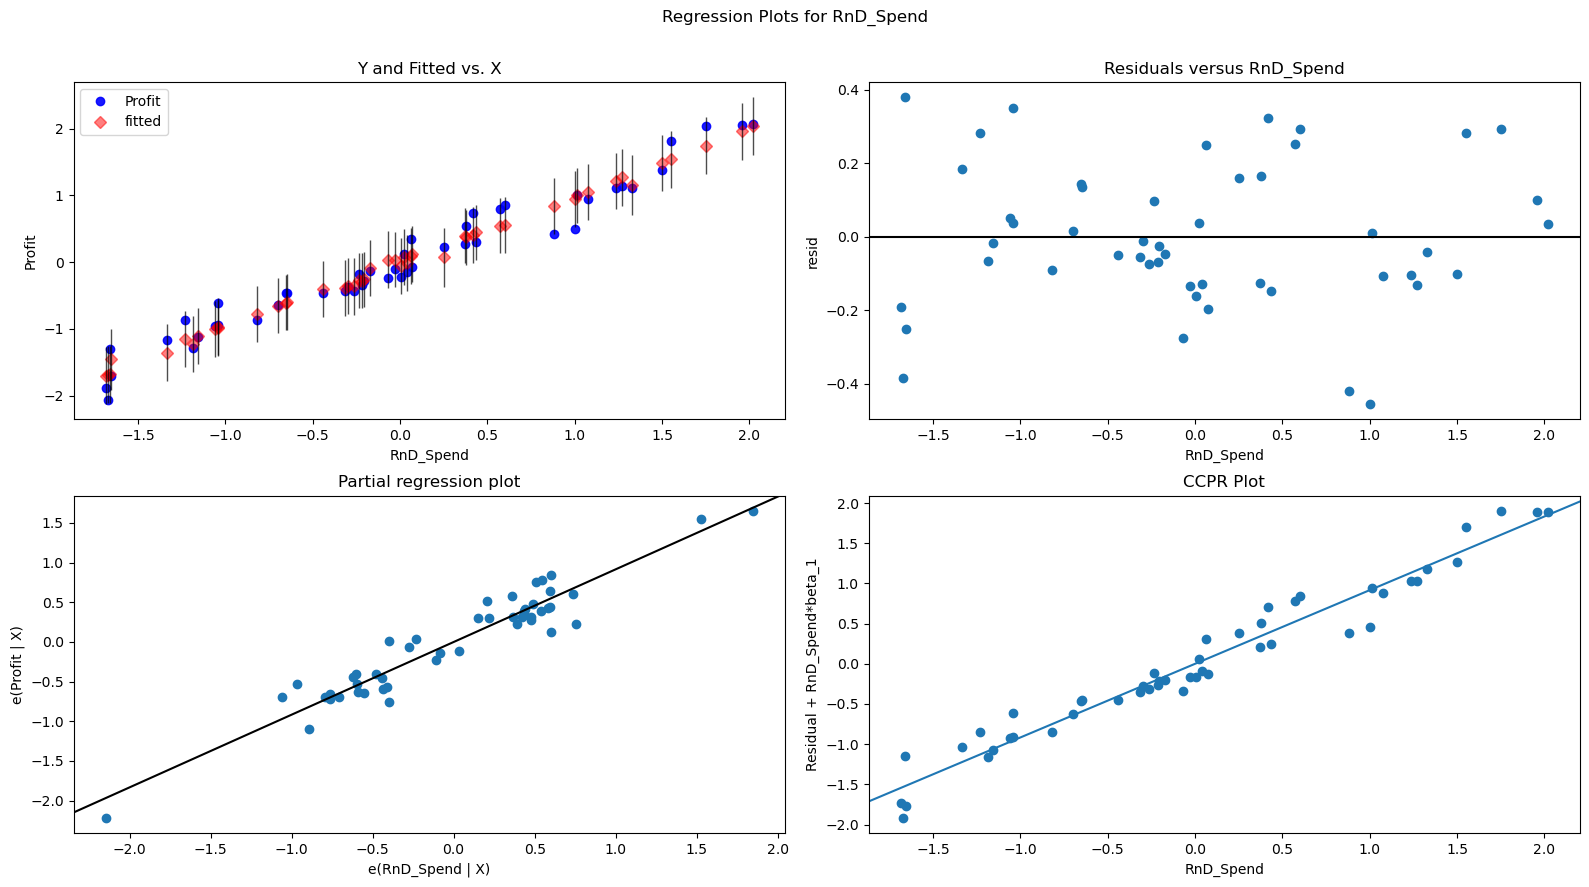

In [53]:
fig=plt.figure(figsize=(16,9))
smf.graphics.plot_regress_exog(Market_RnD_model,'RnD_Spend',fig=fig)
plt.show()

All our Assumptions are satisfied by the above model
+ Feature should be independent of each other, there should'nt be any dependency upon each other.
+ It is satisfied by the model using Marketing feature.
+ While building a model using Marketing we got better results better AIC, BIC, R-squared, R-squared adjusted, p_value(Test of Independence) and F-statistics score by comparing it with the model in which Adminstration feature was used.

Let's compare the residuals of both the models to come up with an conclusion.

#### Model Validation
Comparing different models with respect to their Root Mean Squared Errors

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
Data_4.columns

Index(['RnD_Spend', 'Admin', 'Market_Spend', 'Profit'], dtype='object')

In [56]:
x=Data_4.drop('Profit',axis=1).values
y=Data_4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 3)
Shape of y: (49, 1)


In [57]:
# Splitting the dataset into the Train and Test set
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.25,random_state=42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 3)
Shape of X_test:  (13, 3)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [58]:
#Scaling 
transformer_x=StandardScaler().fit(x_train)
transformer_y=StandardScaler().fit(y_train) 
x_train_scal=transformer_x.transform(x_train)
x_test_scal=transformer_x.transform(x_test)
y_train_scal=transformer_y.transform(y_train)
y_test_scal=transformer_y.transform(y_test)

#Linear Regression
regressor_linear=LinearRegression()
regressor_linear.fit(x_train_scal,y_train_scal)

LinearRegression()

In [59]:
# Scale the test dataset
X_test_scaled = transformer_x.transform(x_test)

# Predict with the trained model
prediction = regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train_scal, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train_scal)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test_scal)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_all_feature_train)
print('R2_score (test): ', r2_score_all_feature_test)
print("RMSE using all features: ", rmse_linear_using_all_features)

CV:  0.9059814869956572
R2_score (train):  0.9650197585709105
R2_score (test):  0.9341582772336137
RMSE using all features:  8385.783571480782


###### Using RnD and Market

In [60]:
x=Data_4.drop(['Profit','Admin'],axis=1).values
y=Data_4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 2)
Shape of y: (49, 1)


In [61]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 2)
Shape of X_test:  (13, 2)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [62]:
#Scaling 
transformer_x=StandardScaler().fit(x_train)
transformer_y=StandardScaler().fit(y_train) 
x_train_scal=transformer_x.transform(x_train)
x_test_scal=transformer_x.transform(x_test)
y_train_scal=transformer_y.transform(y_train)
y_test_scal=transformer_y.transform(y_test)

#Linear Regression
regressor_linear=LinearRegression()
regressor_linear.fit(x_train_scal,y_train_scal)

LinearRegression()

In [63]:
# Scale the test dataset
X_test_scaled=transformer_x.transform(x_test)

# Predict with the trained model
prediction=regressor_linear.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled=transformer_y.inverse_transform(prediction)


# Predicting Cross Validation Score the Test set results
cv_linear=cross_val_score(estimator=regressor_linear,X=x_train_scal,y=y_train_scal,cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train=regressor_linear.predict(x_train_scal)
r2_score_rnd_and_marketing_train=r2_score(y_train_scal,y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test=regressor_linear.predict(x_test_scal)
r2_score_rnd_and_marketing_test=r2_score(y_test_scal,y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_RnD_and_marketing=(np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ",cv_linear.mean())
print('R2_score (train): ',r2_score_rnd_and_marketing_train)
print('R2_score (test): ',r2_score_rnd_and_marketing_test)
print("RMSE using RnD and Marketing feature: ",rmse_linear_using_RnD_and_marketing)

CV:  0.9114070932851247
R2_score (train):  0.9643536571553787
R2_score (test):  0.939185037123506
RMSE using RnD and Marketing feature:  8059.317765282765


###### Only RnD

In [64]:
x=Data_4.iloc[:,:1].values
y=Data_4.iloc[:,3:].values.reshape(-1,1)
print("Shape of x: ",x.shape)
print("Shape of y:",y.shape)

Shape of x:  (49, 1)
Shape of y: (49, 1)


In [65]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (36, 1)
Shape of X_test:  (13, 1)
Shape of y_train:  (36, 1)
Shape of y_test (13, 1)


In [66]:
#Scaling 
transformer_x=StandardScaler().fit(x_train)
transformer_y=StandardScaler().fit(y_train) 
x_train_scal=transformer_x.transform(x_train)
x_test_scal=transformer_x.transform(x_test)
y_train_scal=transformer_y.transform(y_train)
y_test_scal=transformer_y.transform(y_test)

#Linear Regression
regressor_linear_using_rnd=LinearRegression()
regressor_linear_using_rnd.fit(x_train_scal,y_train_scal)

LinearRegression()

In [67]:
# Scale the test dataset
X_test_scaled=transformer_x.transform(x_test)

# Predict with the trained model
prediction=regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled=transformer_y.inverse_transform(prediction)


# Predicting Cross Validation Score the Test set results
cv_linear=cross_val_score(estimator=regressor_linear_using_rnd,X=x_train_scal,y=y_train_scal,cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train=regressor_linear_using_rnd.predict(x_train_scal)
r2_score_rnd_train=r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test=regressor_linear_using_rnd.predict(x_test_scal)
r2_score_rnd_test=r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE on Test set results
rmse_linear_using_only_RnD=(np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_rnd_train)
print('R2_score (test): ', r2_score_rnd_test)
print("RMSE using only RnD feature: ", rmse_linear_using_only_RnD)

CV:  0.8900789292733178
R2_score (train):  0.957733077239081
R2_score (test):  0.9521017609333128
RMSE using only RnD feature:  7152.417057875892


###### Let's compare the Root Mean Squared Error and check for the minimum value

In [68]:
rmse_compare = {'Using All Features Model': rmse_linear_using_all_features,'Using RnD and Marketing Feature Model': rmse_linear_using_RnD_and_marketing, 'Using only R&D Feauture Model': rmse_linear_using_only_RnD}
min(rmse_compare, key=rmse_compare.get)

'Using only R&D Feauture Model'

+ The Model that was build without using Administration and Marketing feature performed very well.
+ Scoring minimumn Root mean squared error and maximum R-squared and adjusted R-squared and highest linear relation.
###### For further We are going to use the model whihc was build by using only R&D feature

In [69]:
final_model=sm.ols('Profit~RnD_Spend',data=Scaled_Data_3).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           7.56e-34
Time:                        10:09:04   Log-Likelihood:                 7.7569
No. Observations:                  49   AIC:                            -11.51
Df Residuals:                      47   BIC:                            -7.730
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.839e-16      0.030   -6.1e-15      1.000      -0.061       0.061
RnD_Spend      0.9784      0.030     32.477      0.000       0.918       1.039
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Residual Analysis
###### Test for Normality of Residuals (Q-Q Plot)

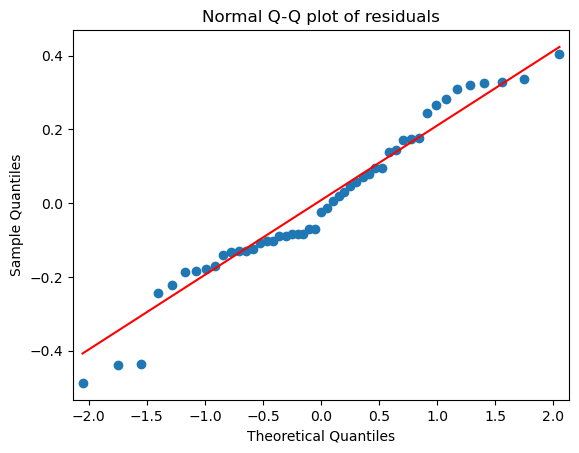

In [70]:
smf.qqplot(final_model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

Error should have Normal / Gaussian distribution~N(0,1) and independently and identically distributed.

###### Residual Plot for Homoscedasticity

In [71]:
def get_standardized_values( vals ):
    return (vals-vals.mean())/vals.std()

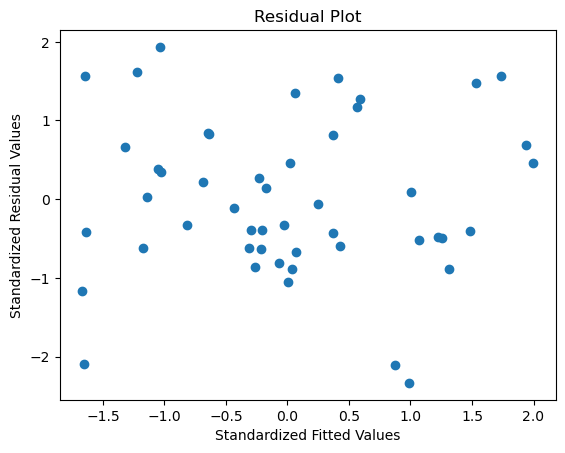

In [72]:
plt.scatter(get_standardized_values(final_model.fittedvalues),get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

Constant Variance (Homoscedasticity) in Error

#### Residual VS Regressors
Plotting to visualize the partial relation of each independent feature with the Dependent variable and errors

eval_env: 1


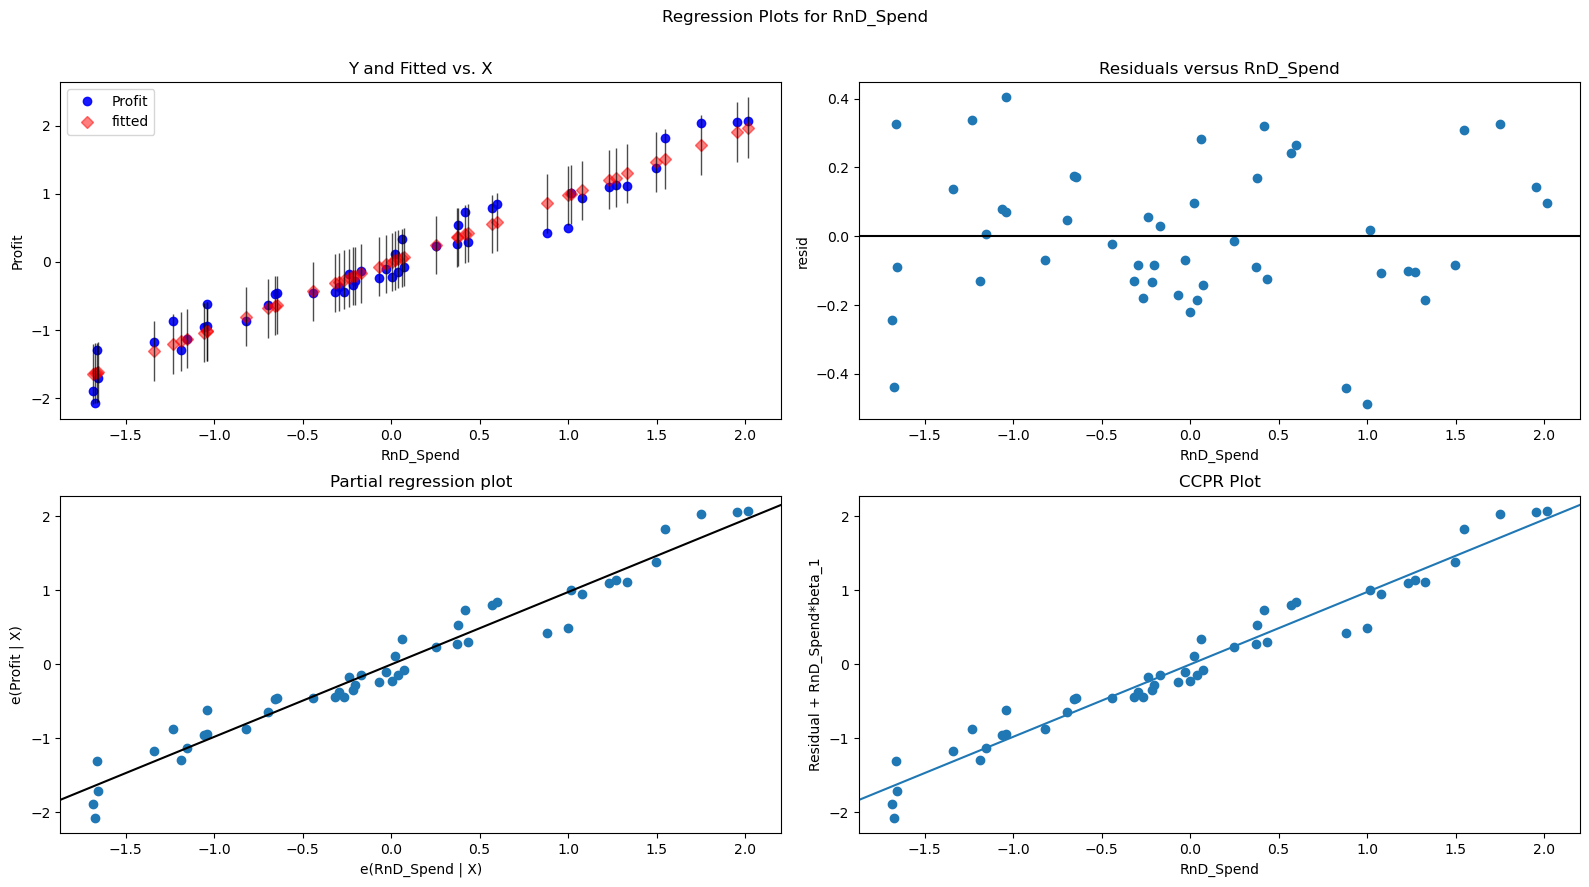

In [73]:
fig=plt.figure(figsize=(16,9))
plot_RnD=smf.graphics.plot_regress_exog(final_model,'RnD_Spend',fig=fig)
plt.show()

+ Each Feature and Model Error (residuals) should be independent of each other
+ There should be a linear relation between the dependent variable and Independent variables
###### All our assumptions are satisfied. Hence, we can say our model is a good model let us test more to make it even better.

#### Detecting Influencers/Outliers in the Model
By using Cook's Distance

In [74]:
influence_points=final_model.get_influence()
c, p_value=influence_points.cooks_distance

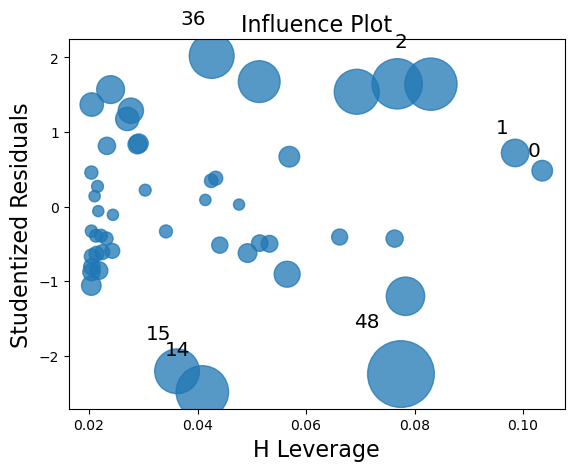

In [75]:
from statsmodels.graphics.regressionplots import influence_plot
# Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(final_model)
plt.show()

Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints

In [76]:
k=Data_4.shape[1]
n=Data_4.shape[0]
leverage_cutoff=(3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,2))

Cut-off line at 0.31


Let's plot the influencers and also plot a cut off line using the stem plot

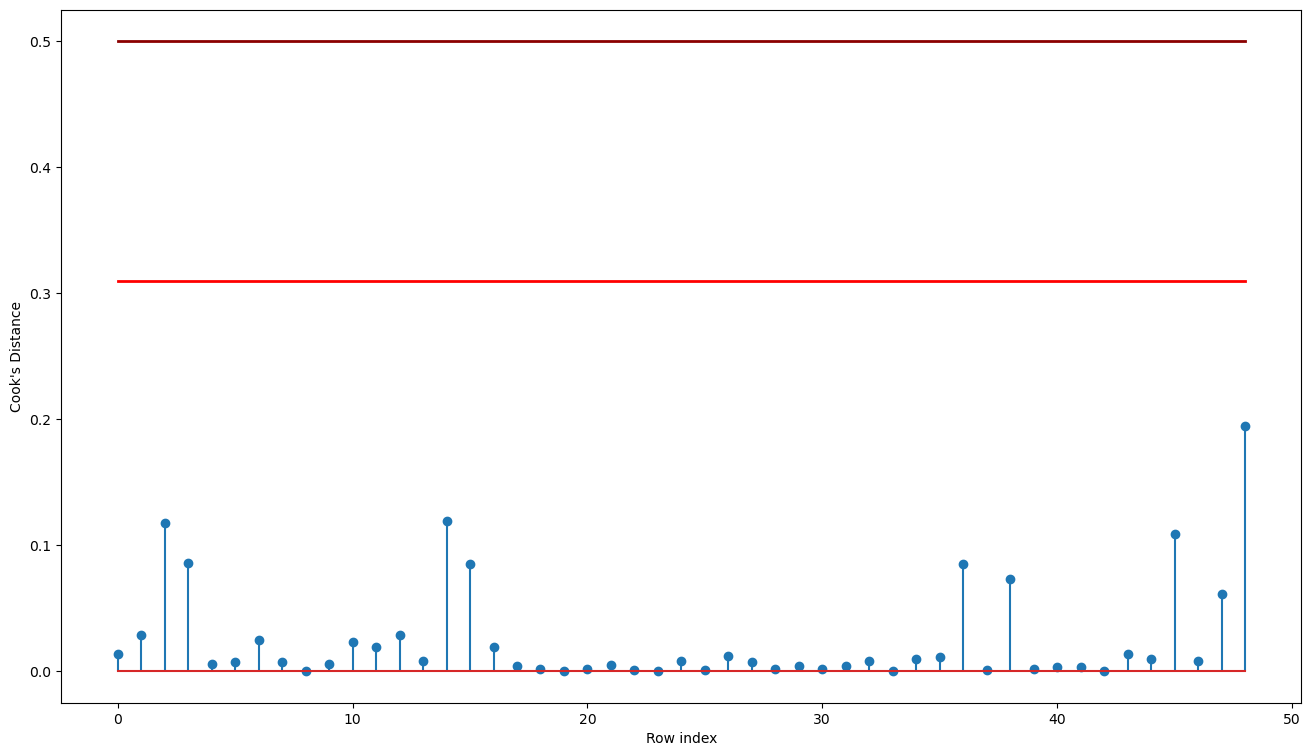

In [77]:
fig = plt.figure(figsize=(16,9))
x=[0,48]
y=[0.5,0.5]
plt.plot(x,y,color='darkred',linewidth=2)
y1=[0.31,0.31]
plt.plot(x,y1,color='red',linewidth=2)
plt.stem(np.arange(len(Data_4)),np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

All the points are below our cut-off line.Hence, we can say that there are no influncers present in our model we can proceed with the predictions

#### Predicting values from Model using same dataset

In [78]:
# Scale the test dataset
X_test_scaled=transformer_x.transform(Data_4.RnD_Spend.values.reshape(-1,1))

# Predict with the trained model
prediction=regressor_linear_using_rnd.predict(X_test_scaled)

# Inverse transform the prediction
prediction_unscaled=transformer_y.inverse_transform(prediction)

In [79]:
predicted=pd.DataFrame(prediction_unscaled,columns=['Predicted_Profit'])
predicted['Profit']=Data_4.Profit
predicted['RnD_Spend']=Data_4.RnD_Spend
predicted

,Predicted_Profit,Profit,RnD_Spend
0,188741.633166,192261.83,165349.20
1,186461.632949,191792.06,162597.70
2,178874.456794,191050.39,153441.51
3,171359.446810,182901.99,144372.41
4,169482.521463,166187.94,142107.34
5,161005.179859,156991.12,131876.90
6,163274.457488,156122.51,134615.46
7,159696.949460,155752.60,130298.13
8,151613.070514,152211.77,120542.52
9,153926.928921,149759.96,123334.88


###### Table containing R^2 value for each prepared model

In [81]:
models={'Different_Models':['With_Outlier','Median_Imputation_Outlier','Mean_Imputation_outlier','Removed_outlier','Using All Features Model','Using RnD and Marketing Feature Model','Using only R&D Feauture Model'],
        'R_squared':[Model_with_Outlier.rsquared,after_median_imputation_model.rsquared,after_mean_imputation_model.rsquared,removed_outlier_model.rsquared,r2_score_all_feature_train,r2_score_rnd_and_marketing_train,r2_score_rnd_train],
        'R_squared_adjusted':[Model_with_Outlier.rsquared_adj,after_median_imputation_model.rsquared_adj,after_mean_imputation_model.rsquared_adj,removed_outlier_model.rsquared_adj,model.rsquared_adj,Market_RnD_model.rsquared_adj,RnD_slr_model.rsquared_adj],
       'RMSE':[np.sqrt(Model_with_Outlier.mse_resid),np.sqrt(after_median_imputation_model.mse_resid),np.sqrt(after_mean_imputation_model.mse_resid),np.sqrt(removed_outlier_model.mse_resid),rmse_linear_using_all_features,rmse_linear_using_RnD_and_marketing,rmse_linear_using_only_RnD]}
model_table=pd.DataFrame(models)
model_table


,Different_Models,R_squared,R_squared_adjusted,RMSE
0,With_Outlier,0.950746,0.947534,9232.334837
1,Median_Imputation_Outlier,0.918296,0.912967,11148.345424
2,Mean_Imputation_outlier,0.911954,0.906212,11570.325358
3,Removed_outlier,0.961316,0.958737,7753.807752
4,Using All Features Model,0.965020,0.958737,8385.783571
5,Using RnD and Marketing Feature Model,0.964354,0.959394,8059.317765
6,Using only R&D Feauture Model,0.957733,0.956432,7152.417058


###### Visualizing Models Performance

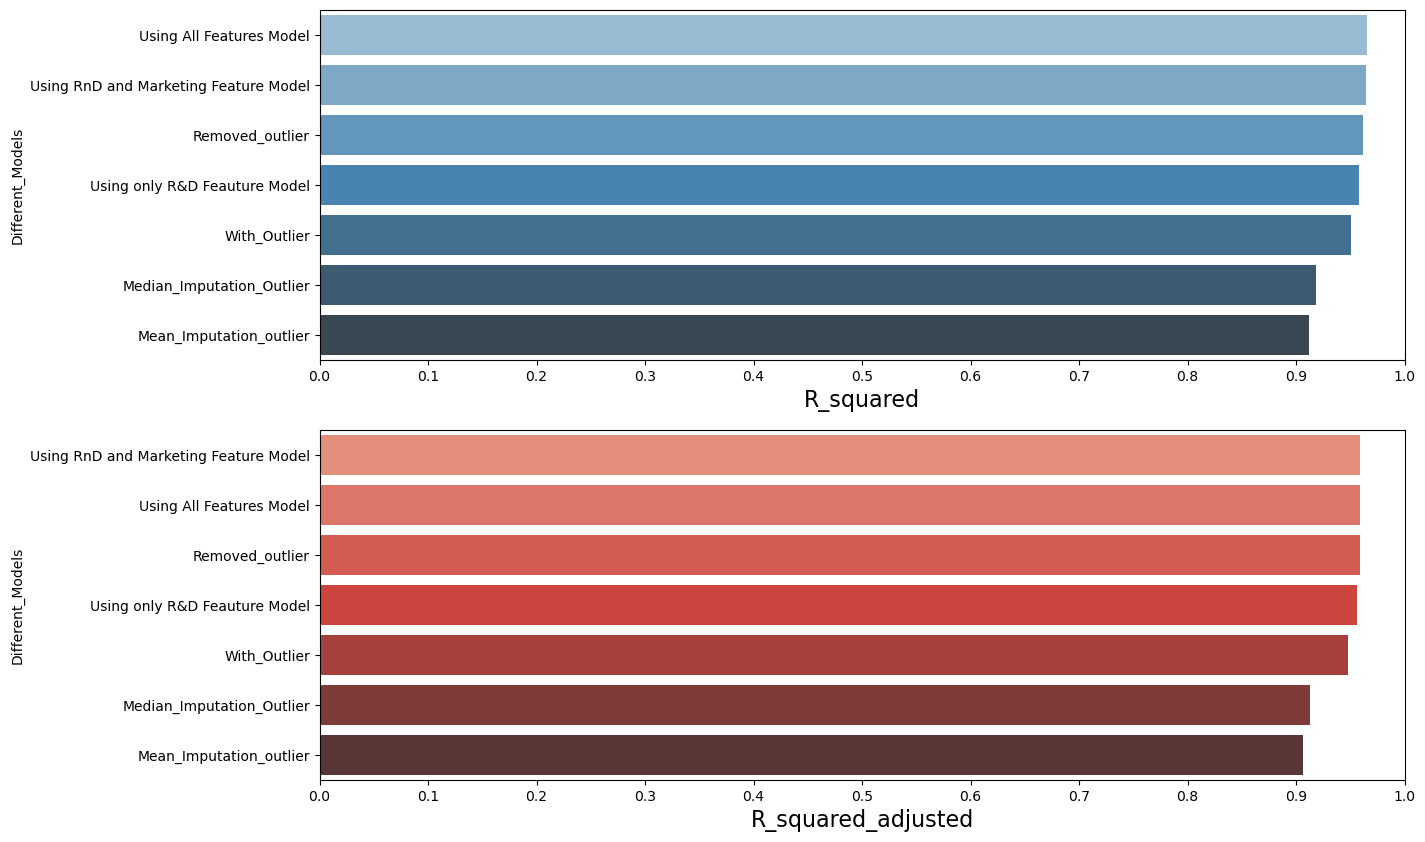

In [82]:
f,axes=plt.subplots(2,1,figsize=(14,10))

model_table.sort_values(by=['R_squared'],ascending=False,inplace=True)

sns.barplot(x='R_squared',y='Different_Models',data=model_table,palette='Blues_d',ax = axes[0])
axes[0].set_xlabel('R_squared',size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'],ascending=False,inplace=True)

sns.barplot(x='R_squared_adjusted',y='Different_Models',data=model_table,palette='Reds_d',ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted',size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

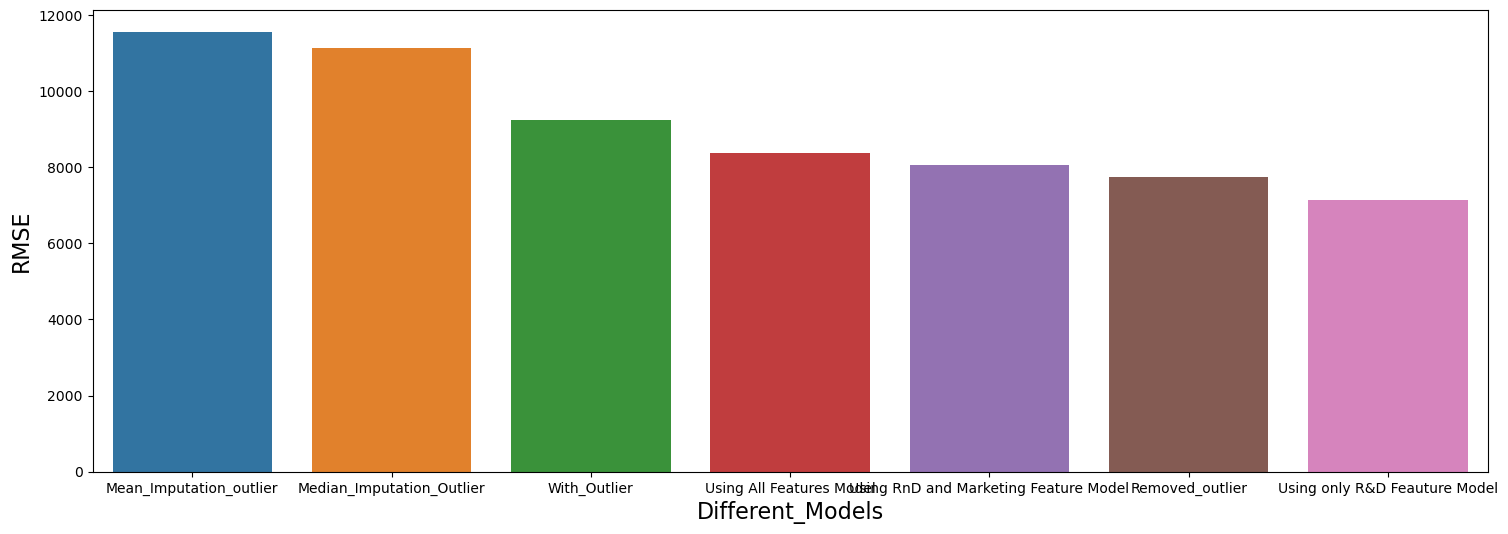

In [83]:
model_table.sort_values(by=['RMSE'],ascending=False,inplace=True)

f,axe=plt.subplots(1,1,figsize=(18,6))
sns.barplot(x='Different_Models',y='RMSE',data=model_table,ax = axe)
axe.set_xlabel('Different_Models',size=16)
axe.set_ylabel('RMSE',size=16)

plt.show()